In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
hard_elec = pd.read_csv('top_8_features_manu_good- Copy - Copy.csv')

#hard = pd.read_csv("hardness_composition_data.csv")
hard_elec_ip = hard_elec.drop(columns = ["Hardness"])
hard_elec_op =hard_elec["Hardness"]




hard_elec.head()


,delta S,delta x,omega,e1/a,delta H,upper lamda,del r,VEC,Hardness
0,5.220150,0.118929,1.628118,2.080,-6.24,4475.196904,0.052701,7.840,305.4
1,7.903767,0.101627,7.780073,2.002,-3.00,5327.028361,0.047989,8.723,279.6
2,6.953224,0.106557,10.438898,2.002,-2.11,5090.971336,0.050502,8.507,299.2
3,7.903767,0.109055,6.309309,2.002,-3.72,4936.111748,0.051827,8.372,323.8
4,7.494819,0.112353,2.192015,1.998,-6.84,4608.793586,0.053813,8.118,420.0


In [2]:
X = hard_elec_ip
y = hard_elec_op

In [3]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
   y,
    test_size=0.1,
    random_state=0)

X_train.shape, X_test.shape

((184, 8), (21, 8))

In [4]:
#Features of X_train after dropping correlated features:
#Index(['del r', 'delta x', 'VEC', 'delta H', 'delta S', 'omega', 'upper lamda',
       #'e1/a', 'e2/a', 'Ec'],
     # dtype='object')

In [5]:
# Print the features of X_train
print("Features of X_train after dropping correlated features:")
print(X_train.columns)

# Print the features of X_test
print("\nFeatures of X_test after dropping correlated features:")
print(X_test.columns)

Features of X_train after dropping correlated features:
Index(['delta S', 'delta x', 'omega', 'e1/a', 'delta H', 'upper lamda',
       'del r', 'VEC'],
      dtype='object')

Features of X_test after dropping correlated features:
Index(['delta S', 'delta x', 'omega', 'e1/a', 'delta H', 'upper lamda',
       'del r', 'VEC'],
      dtype='object')


In [6]:
# Load the trained model
with open('model_top8_10thjul_hoyeja.pkl', 'rb') as f:
    clf2 = pickle.load(f)
import pickle


# Now you can use clf2 to make predictions or perform other tasks


# Predict using the trained model
prediction = clf2.predict(X_test.iloc[0:1]) # Predict using the first row of the test set
print(prediction)

[456.2278319]


In [7]:
!pip install shap --upgrade



Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
import shap
shap.initjs()

ExactExplainer explainer: 206it [02:33,  1.31it/s]                                                                     


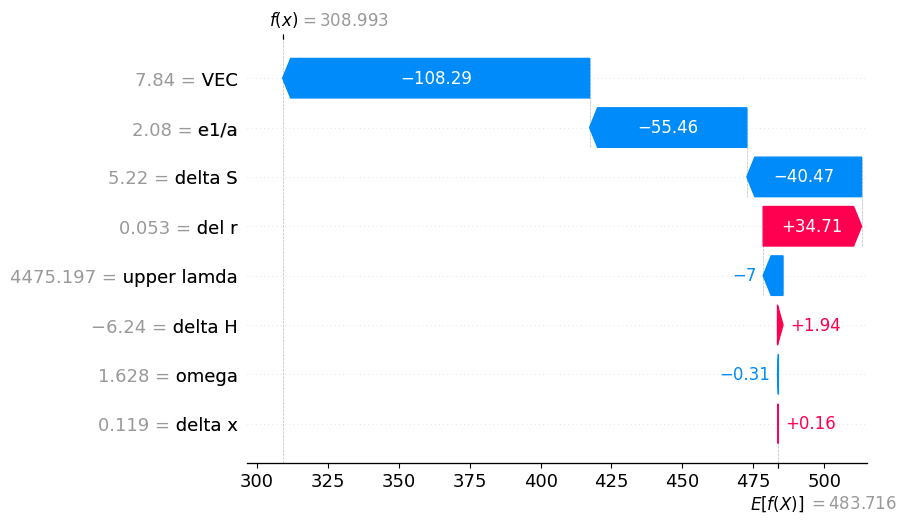

In [10]:
# Explain model predictions using SHAP
#explainer = shap.Explainer(clf2.predict)
#shap_values = explainer(X)
# Plot SHAP waterfall plots
import shap

# Assuming clf2 is your trained model and X is your input data
explainer = shap.Explainer(clf2.predict, masker=shap.maskers.Independent(X))

# Calculate SHAP values
shap_values = explainer(X)

# Plot SHAP waterfall plots for the first instance
shap.waterfall_plot(shap_values[0])


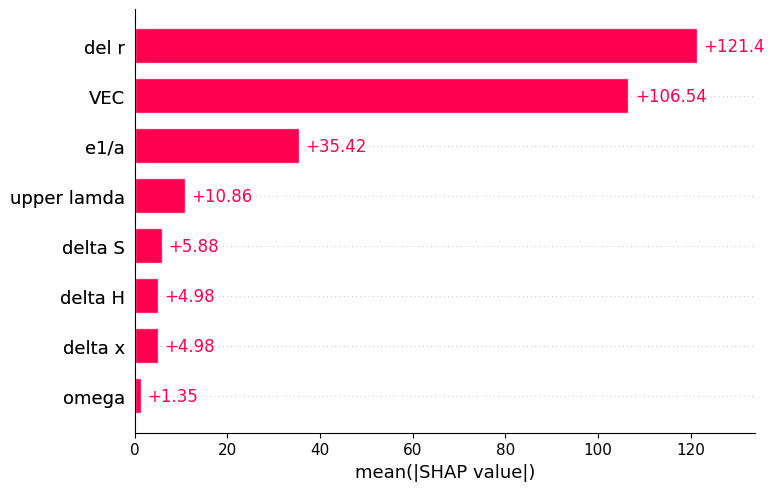

In [11]:
shap.plots.bar(shap_values)

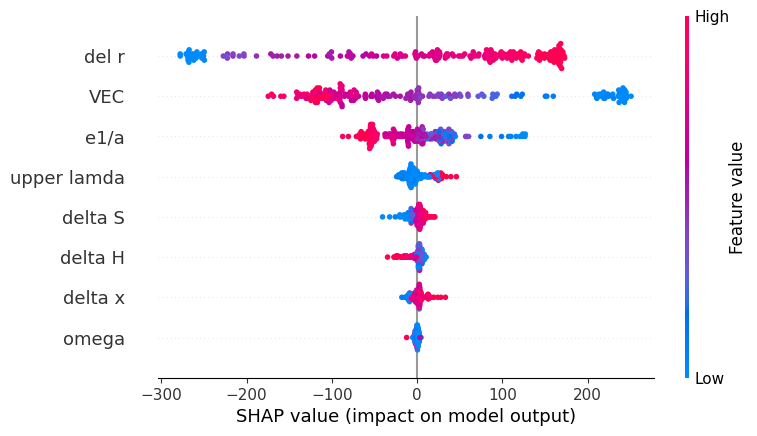

In [12]:
shap.plots.beeswarm(shap_values)

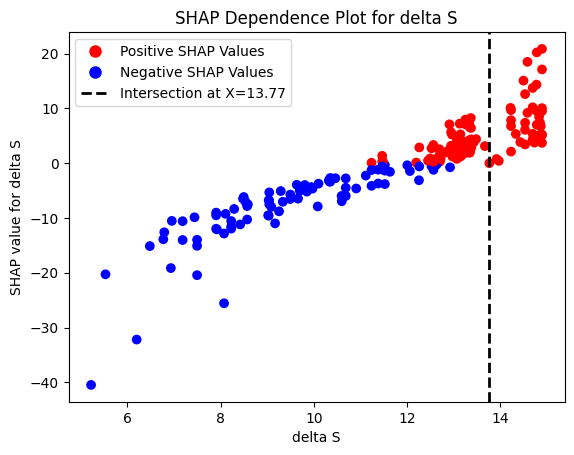

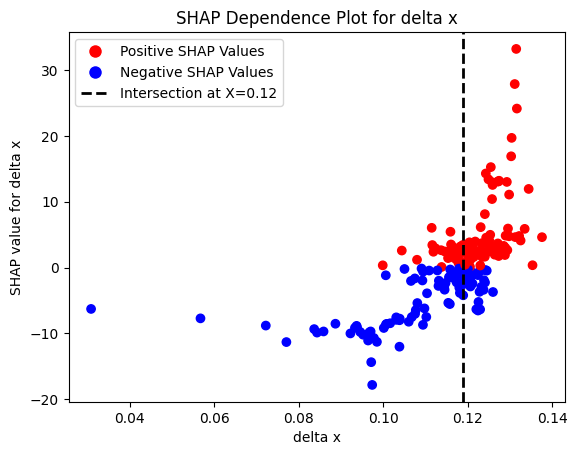

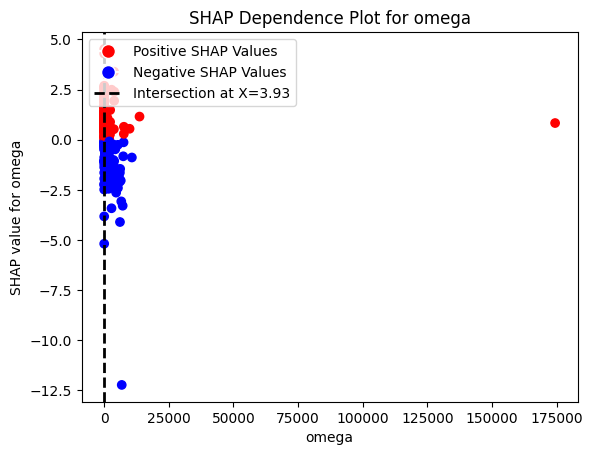

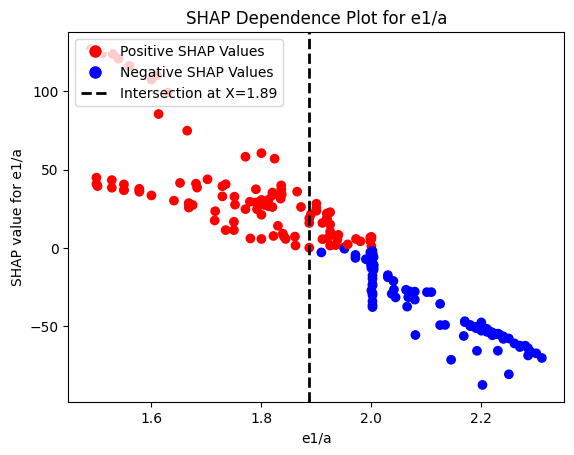

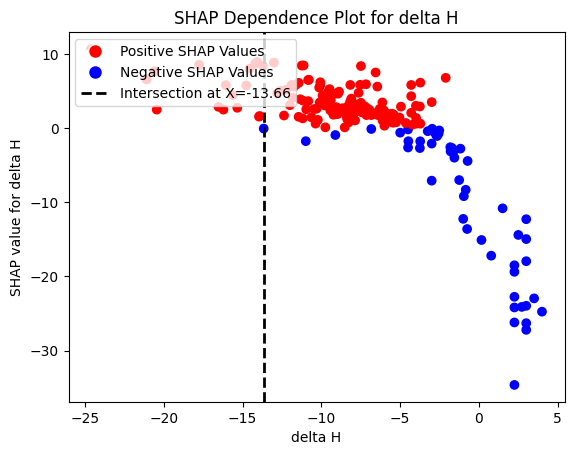

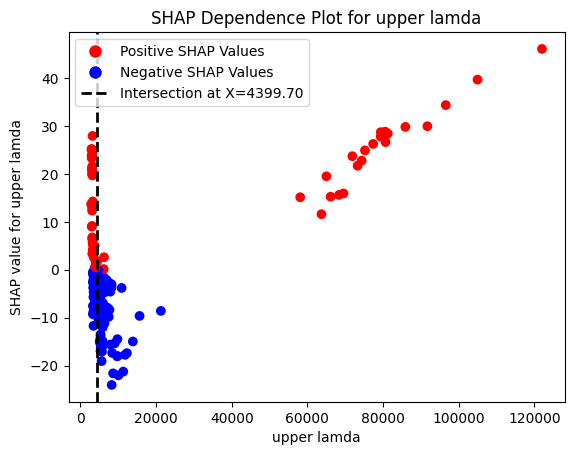

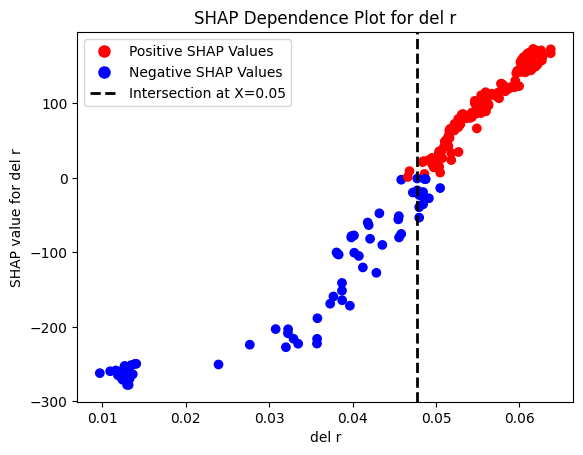

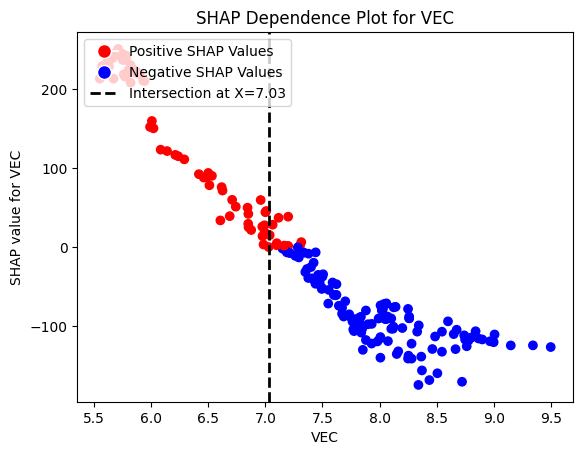

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot SHAP dependence with vertical line at SHAP value 0.0000001
def plot_shap_dependence(feature, shap_values, X):
    plt.figure()
    
    # Extract SHAP values for the feature
    shap_values_feature = shap_values[:, X.columns.get_loc(feature)].values
    
    # Determine colors based on SHAP values sign
    colors = ['red' if val >= 0 else 'blue' for val in shap_values_feature]
    
    # Plot the SHAP values with colors
    plt.scatter(X[feature], shap_values_feature, c=colors, label='SHAP Values')
    
    # Find the index where SHAP values are closest to 0.0000001
    closest_to_zero_index = np.argmin(np.abs(shap_values_feature - 0.0000001))
    
    # Get the corresponding x-value
    inflection_x = X[feature].iloc[closest_to_zero_index]
    
    # Plot the vertical line at the x-value and add to legend
    plt.axvline(x=inflection_x, color='black', linestyle='--', linewidth=2, label=f'Intersection at X={inflection_x:.2f}')
    
    # Determine colors for legend markers
    pos_color = 'red'
    neg_color = 'blue'
    
    # Create custom legend entries for positive SHAP values, negative SHAP values, and intersection
    pos_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=pos_color, markersize=10, label='Positive SHAP Values')
    neg_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=neg_color, markersize=10, label='Negative SHAP Values')
    inter_legend = plt.Line2D([0], [0], color='black', linestyle='--', linewidth=2, label=f'Intersection at X={inflection_x:.2f}')
    
    # Add custom legend entries to the plot
    plt.legend(handles=[pos_legend, neg_legend, inter_legend], loc='upper left')
    
    # Set title and labels
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel(f"SHAP value for {feature}")
    
    plt.show()

# Example usage: Assuming shap_values and X are defined appropriately

# Loop over each feature to create and display SHAP dependence plotsc
for feature in X.columns:
    plot_shap_dependence(feature, shap_values, X)


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os  # Import the os module for path operations





In [17]:
#normal feature importance